In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'D:\supermarket.csv')

In [5]:
df.shape

(1000, 17)

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df['gross income']= df['gross income'].astype('int')

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,14.861000,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.713534,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.000000,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.000000,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.000000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.000000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.000000,10.00000


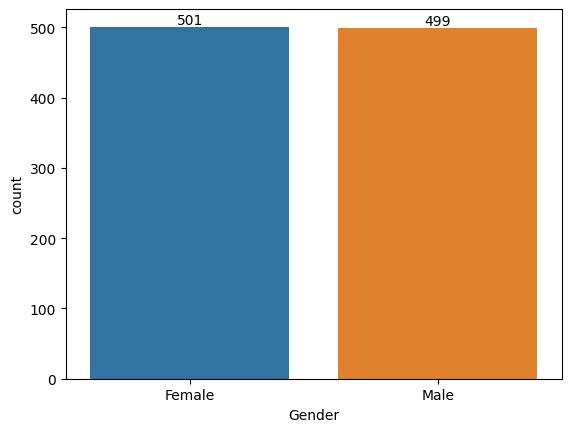

In [11]:
ax= sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Here Male and Female customers are around 50/50

<Axes: xlabel='Gender', ylabel='Total'>

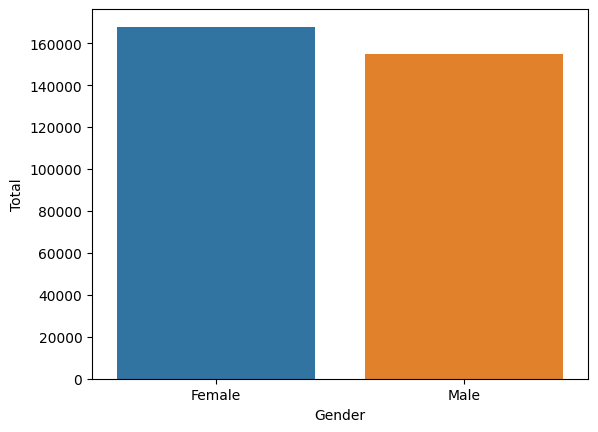

In [12]:
buying_power=df.groupby(['Gender'],as_index= False)['Total'].sum().sort_values(by='Total',ascending=False)
sns.barplot(x='Gender',y='Total',data=buying_power)

Here Male and Female has almost same buying power but Females have slightly more buying power.

<Axes: xlabel='City', ylabel='Quantity'>

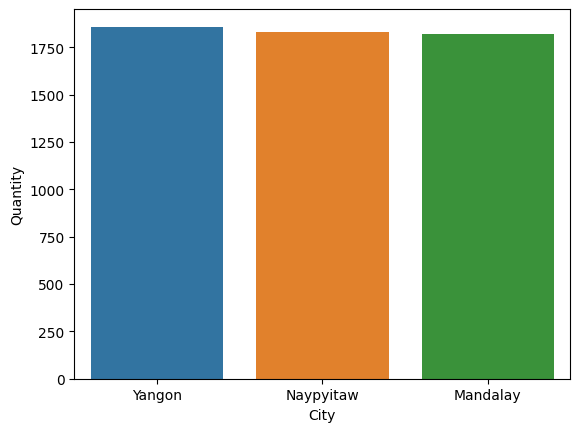

In [13]:
orders_city=df.groupby(['City'],as_index= False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='City',y='Quantity',data=orders_city)

All the cities have almost same number of orders.

<Axes: xlabel='City', ylabel='Total'>

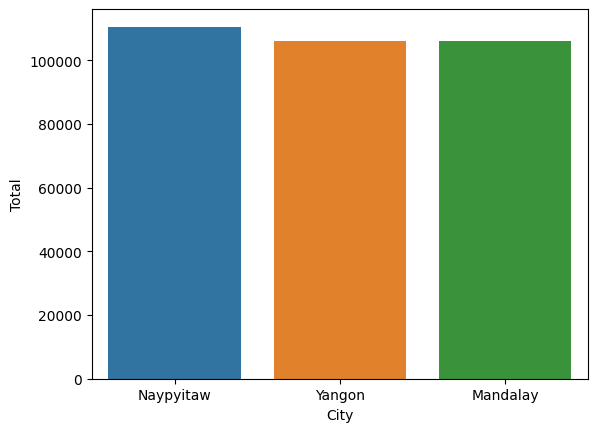

In [14]:
amount_city=df.groupby(['City'],as_index= False)['Total'].sum().sort_values(by='Total',ascending=False)
sns.barplot(x='City',y='Total',data=amount_city)

Naypyitaw city has slightly more buying power than other cities.

<Axes: xlabel='Branch', ylabel='Total'>

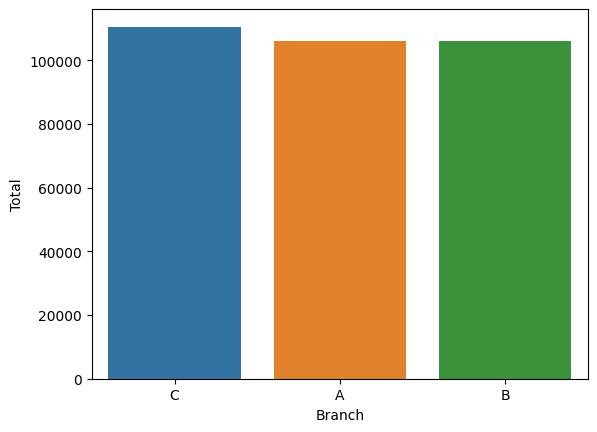

In [15]:
branch_sold=df.groupby(['Branch'],as_index= False)[a'].sum().sort_values(by='Total',ascending=False)
sns.barplot(x='Branch',y='Total',data=branch_sold)

Branch C is slightly more successful.

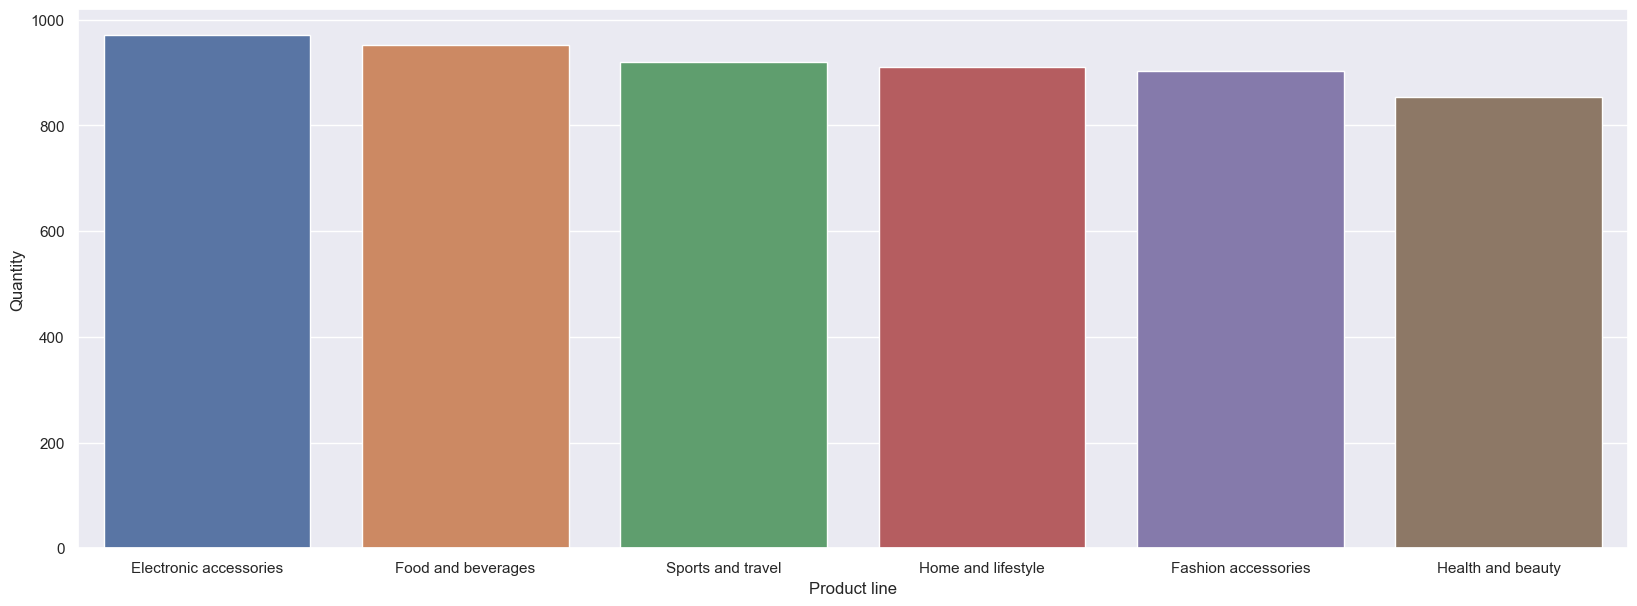

In [18]:
product_sold=df.groupby(['Product line'],as_index= False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='Product line',y='Quantity',data=product_sold)
sns.set(rc={'figure.figsize':(25,7)})

Electronic accessories and Food and beverages got sold the most.

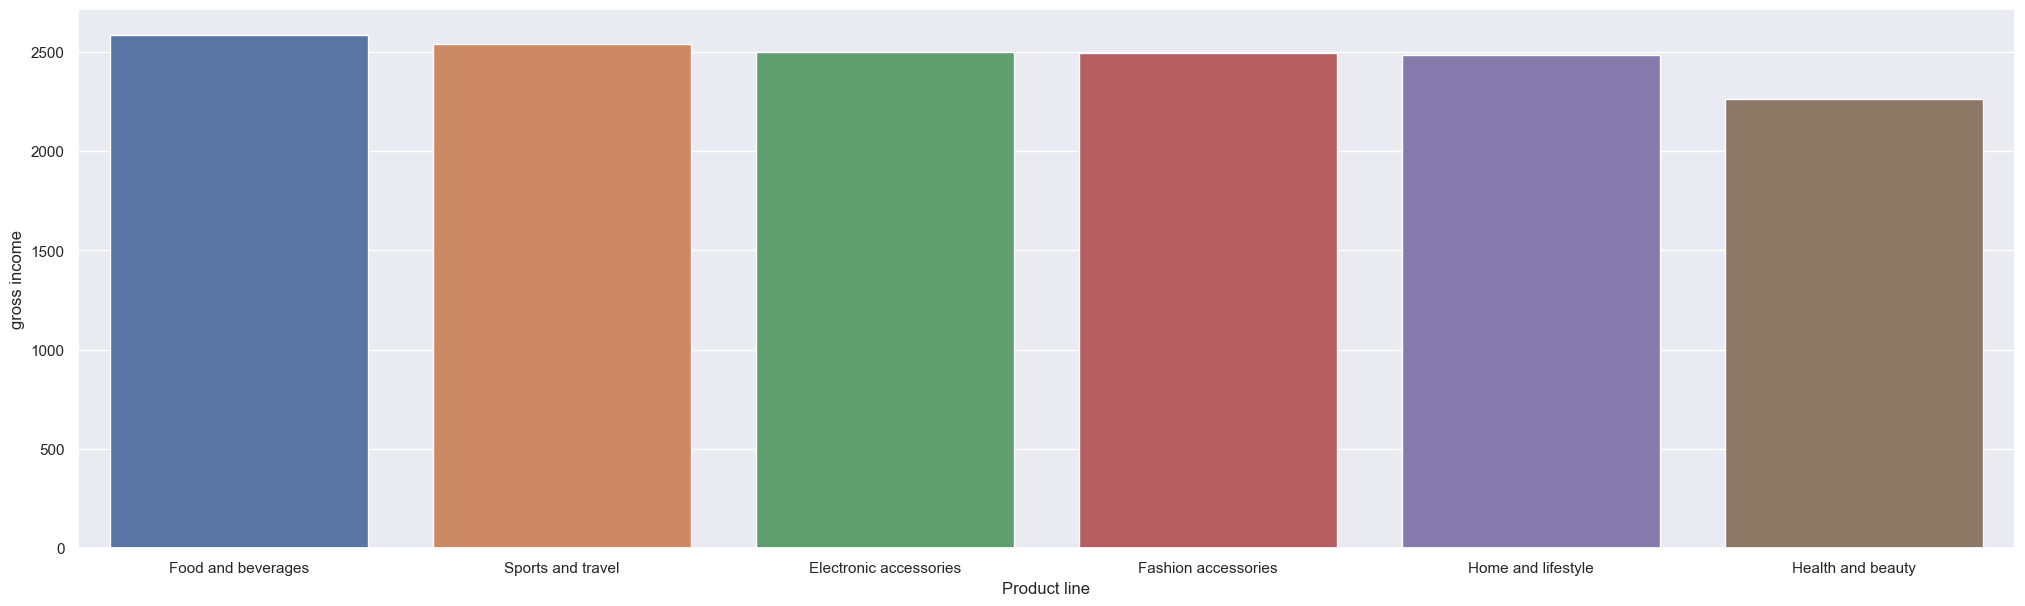

In [26]:
product_income=df.groupby(['Product line'],as_index= False)['gross income'].sum().sort_values(by='gross income',ascending=False)
sns.barplot(x='Product line',y='gross income',data=product_income)
sns.set(rc={'figure.figsize':(25,7)})

Food and beverages and sports and travel products have the higest income.

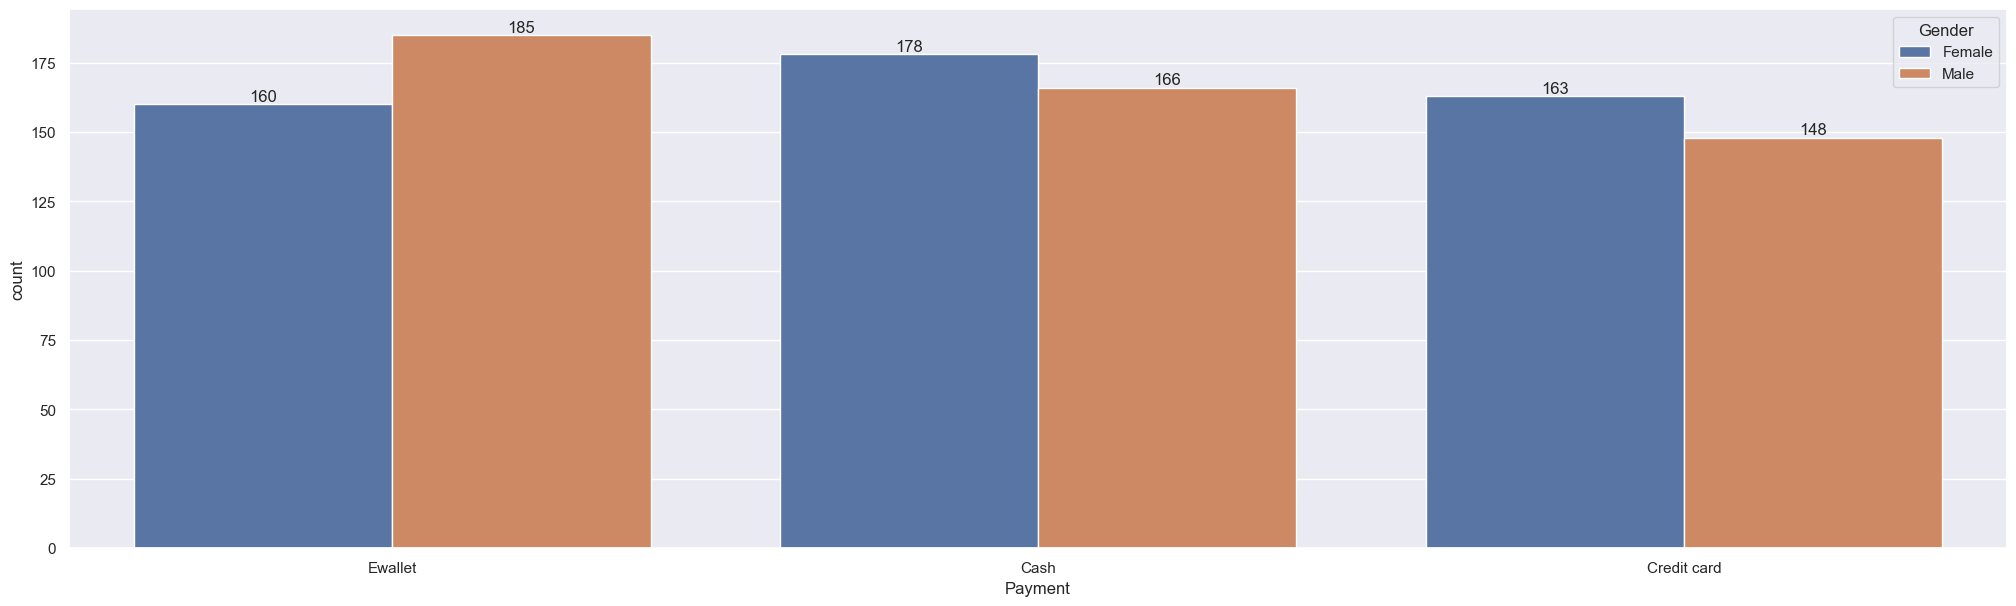

In [21]:
ax= sns.countplot(x='Payment',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

Males use Ewallet more and Females use Cash more.

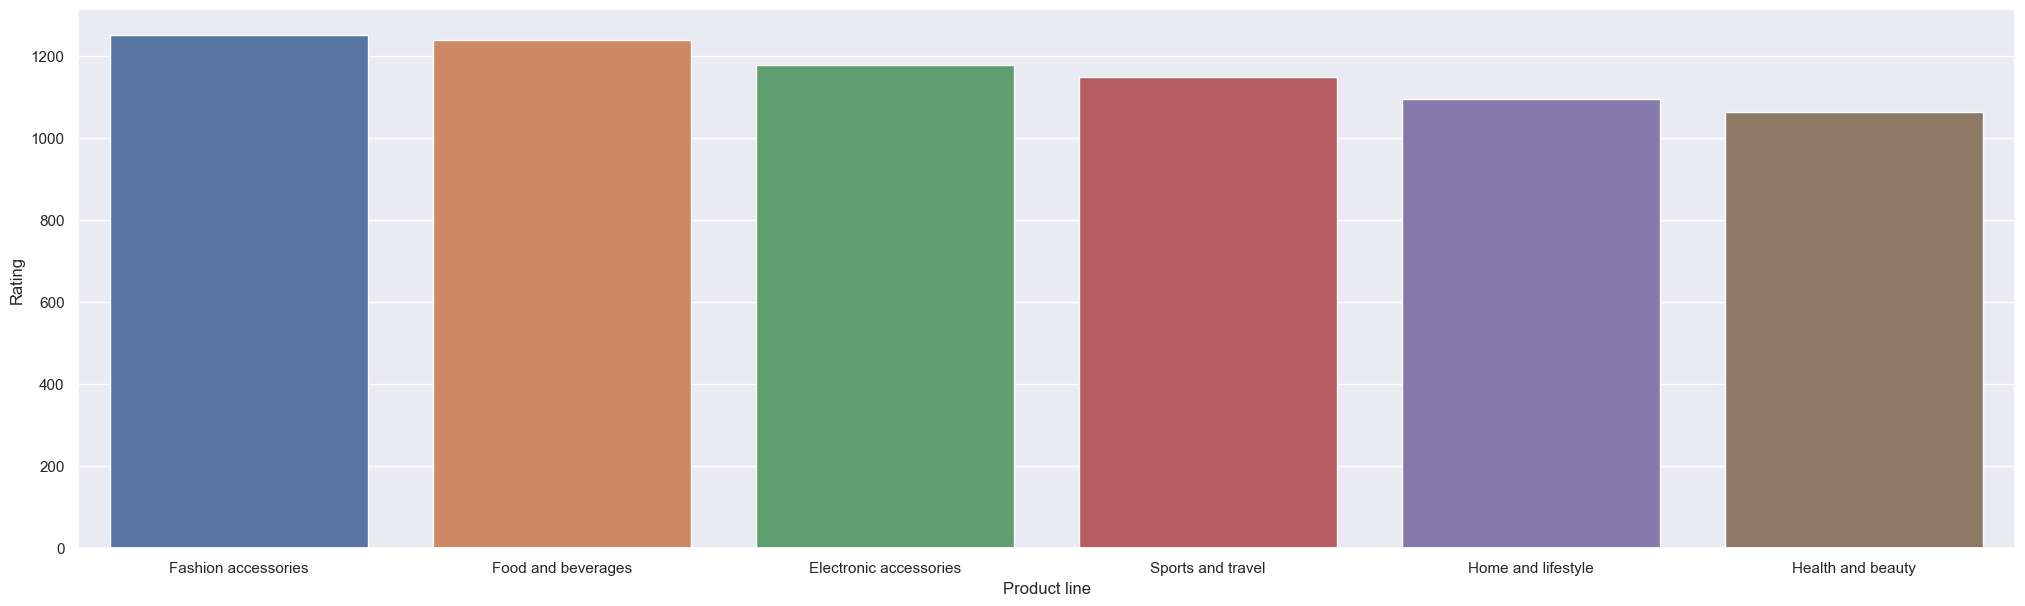

In [32]:
product_income=df.groupby(['Product line'],as_index= False)['Rating'].sum().sort_values(by='Rating',ascending=False)
sns.barplot(x='Product line',y='Rating',data=product_income)
sns.set(rc={'figure.figsize':(25,7)})

Fashion and Food items got the highest rating and Lifestyle and Health items got the lowest rating.